In [2]:
## This notebook loads the MEG timeseries (one text file for each frequency band) that were generated 
## after processing the MEG data (details regarding processing contained in the MEG_processing.md file)
## and uses them to plot a functional connectivity matrix and a graph. 
## It calls nilearn functions to set the atlas labels and to plot the functional connectivity results, and 
## then uses ipywidgets to create and display the interactive figure

In [4]:
# First we set up the tools we will be using

# Ipywidgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# nilearn tools
from nilearn import datasets
from nilearn import plotting
from nilearn.connectome import ConnectivityMeasure

# numpy
import numpy as np

/media/jonathan/Data/miniconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Atlas ROIs are located at: /home/jonathan/nilearn_data/destrieux_2009/destrieux2009_rois_lateralized.nii.gz


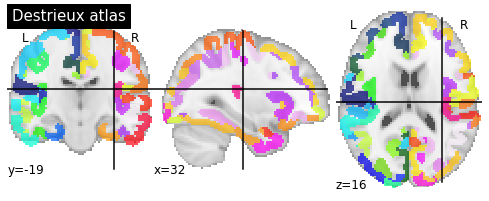

In [5]:
# Then we grab the atlas we want to use from nilearn

# Download the destrieux atlas 2009
dataset = datasets.fetch_atlas_destrieux_2009(lateralized=True) # get dataset
atlas_filename = dataset.maps # set atlas images
labels = dataset.labels # set atlas labels

print('Atlas ROIs are located at: %s' % atlas_filename) # print atlas location

# plot destrieux atlas with title
plotting.plot_roi(atlas_filename, title="Destrieux atlas")
plotting.show()

In [6]:
# Now load the MEG data
delta = np.loadtxt('/media/jonathan/Data/McGill/HCP/delta_timeseries.txt', delimiter=' ')
theta = np.loadtxt('/media/jonathan/Data/McGill/HCP/theta_timeseries.txt', delimiter=' ')
alpha = np.loadtxt('/media/jonathan/Data/McGill/HCP/alpha_timeseries.txt', delimiter=' ')
beta = np.loadtxt('/media/jonathan/Data/McGill/HCP/beta_timeseries.txt', delimiter=' ')
gamma = np.loadtxt('/media/jonathan/Data/McGill/HCP/gamma_timeseries.txt', delimiter=' ')

In [7]:
# Select adequate labeles for the Destrieux atlas (omit 0-background, 42-left median wall and 117-right median wall)
labels = dataset.labels
labels=labels[np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                 31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,
                 61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,
                 91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,
                 115,116,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,
                 138,139,140,141,142,143,144,145,146,147,148,149,150])]

In [17]:
# Create interactive plot containing 2 widgets to pull the data used for plotting:
# First widget "x" allows to select the frequency band
# Second widget "y" allows to scroll across the different subjects

# First widget
matrix = np.zeros((366216,148)) # Pre-allocate matrix
def x(band):
    if band == 0:
        matrix[:,:]= delta[:,:]
    elif band== 1:
        matrix[:,:]= theta[:,:]
    elif band== 2:
        matrix[:,:]= alpha[:,:]
    elif band== 3:
        matrix[:,:]= beta[:,:]
    elif band== 4:
        matrix[:,:]= gamma[:,:]

# Second widget
mat = np.zeros((30518,148)) # Pre-allocate matrix
def y(subject):
    if subject == 0:
        mat[:,:]= matrix[range(0,30518),:]
    elif subject== 1:
        mat[:,:]= matrix[range(30518,61036),:]
    elif subject== 2:
        mat[:,:]= matrix[range(61036,91554),:]
    elif subject== 3:
        mat[:,:]= matrix[range(91554,122072),:]
    elif subject== 4:
        mat[:,:]= matrix[range(122072,152590),:]
    elif subject== 5:
        mat[:,:]= matrix[range(152590,183108),:]
    elif subject== 6:
        mat[:,:]= matrix[range(183108,213626),:]
    elif subject== 7:
        mat[:,:]= matrix[range(213626,244144),:]
    elif subject== 8:
        mat[:,:]= matrix[range(244144,274662),:]
    elif subject== 9:
        mat[:,:]= matrix[range(274662,305180),:]
    elif subject== 10:
        mat[:,:]= matrix[range(305180,335698),:]
    elif subject== 11:
        mat[:,:]= matrix[range(335698,366216),:]
    elif subject== 12:
        mat[:,:]= matrix[range(366216,396734),:]
              
    # Set title with subject name
    c = str(subject+1)            
    title = 'Subject '+c+' MEG Connectivity Matrix'
    print(title)
    
    # Compute connectivity matrix (similar results to the one obtained before)
    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([mat])[0]
    np.fill_diagonal(correlation_matrix, 0) # mask the main diagonal for visualization
    
    # Plot the correlation matrix, setting the labels to our correct list of labels
    f = plotting.plot_matrix(correlation_matrix, figure=(20, 16), labels=labels,
                     vmax=0.8, vmin=-0.8, reorder=False)
    
    # Plot connectome, setting an edge threshold
    coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_filename) # grab center coordinates for atlas labels
    plotting.plot_connectome(correlation_matrix, coordinates,edge_threshold="99.9%",title='Connectivity graph') 

In [18]:
# Display interactive figure
interact(x, band=[('Delta', 0), ('Theta', 1), ('Alpha', 2), ('Beta', 3), ('Gamma', 4)]);
interact(y, subject=[('Subject 1', 0), ('Subject 2', 1), ('Subject 3', 2), ('Subject 4', 3), ('Subject 5', 4), 
             ('Subject 6', 5), ('Subject 7', 6), ('Subject 8', 7), ('Subject 9', 8), ('Subject 10', 9), 
             ('Subject 11', 10), ('Subject 12', 11)]);

interactive(children=(Dropdown(description='band', options=(('Delta', 0), ('Theta', 1), ('Alpha', 2), ('Beta',…

interactive(children=(Dropdown(description='subject', options=(('Subject 1', 0), ('Subject 2', 1), ('Subject 3…